In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-11-14 20:22:24--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-11-14 20:22:24 (4.13 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()

# Convert categorical data to numbers
dataset["sex"].replace(["female", "male"],
                       [0, 1],
                       inplace=True)

dataset["smoker"].replace(["no", "yes"],
    [0, 1],
    inplace=True)

dataset["region"].replace(['southwest', 'southeast', 'northwest', 'northeast'],
    [0, 1, 2, 3],
    inplace=True)

dataset = shuffle(dataset).reset_index(drop=True)

In [ ]:
# Separating the train and test datasets
train_dataset  = dataset[0:int(0.8*dataset.shape[0])]
test_dataset = dataset[int(0.8*dataset.shape[0]):dataset.shape[0] - 1]

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [ ]:
# Creating the model
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 32)                224       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 782 (3.06 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100
)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 11212.5752 - mae: 11212.5752 - mse: 266156240.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 4703.9658 - mae: 4703.9658 - mse: 61621908.0000
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 3436.7981 - mae: 3436.7981 - mse: 40583772.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 3142.7683 - mae: 3142.7683 - mse: 36424544.0000
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 3010.3201 - mae: 3010.3201 - mse: 31822148.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 2837.8745 - mae: 2837.8745 - mse: 30801274.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 2699.5227 - mae: 2699.5227 - mse: 28954828.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 2752.0925 - mae: 2752.0925 - mse: 31048078.0000
Epoch 9/100
34/34 [==========

9/9 - 0s - loss: 1725.9056 - mae: 1725.9056 - mse: 19289128.0000 - 233ms/epoch - 26ms/step
Testing set Mean Abs Error: 1725.91 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 4ms/step


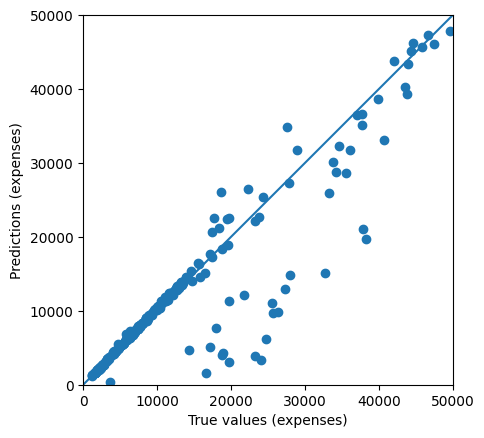

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
